In [120]:
import torch
import numpy as np
import cv2
import random
from PIL import Image

In [121]:
image = Image.open('/home/hanzhongyi/datasets/office/office-31/amazon/images/laptop_computer/frame_0046.jpg')
image = np.asarray(image)
blur_image = cv2.blur(image,(3,3))

In [122]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
sp_img = sp_noise(image,0.005)

In [123]:
def sp_blur_noise(image,prob):
    '''
    Add salt and pepper noise to image
    and gaussian bluring image
    prob: Probability of the noise
    '''
    image = cv2.blur(image,(5,5))
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output
sp_img = sp_noise(image,0.1)
sp_blur_img = sp_blur_noise(blur_image,0.1)

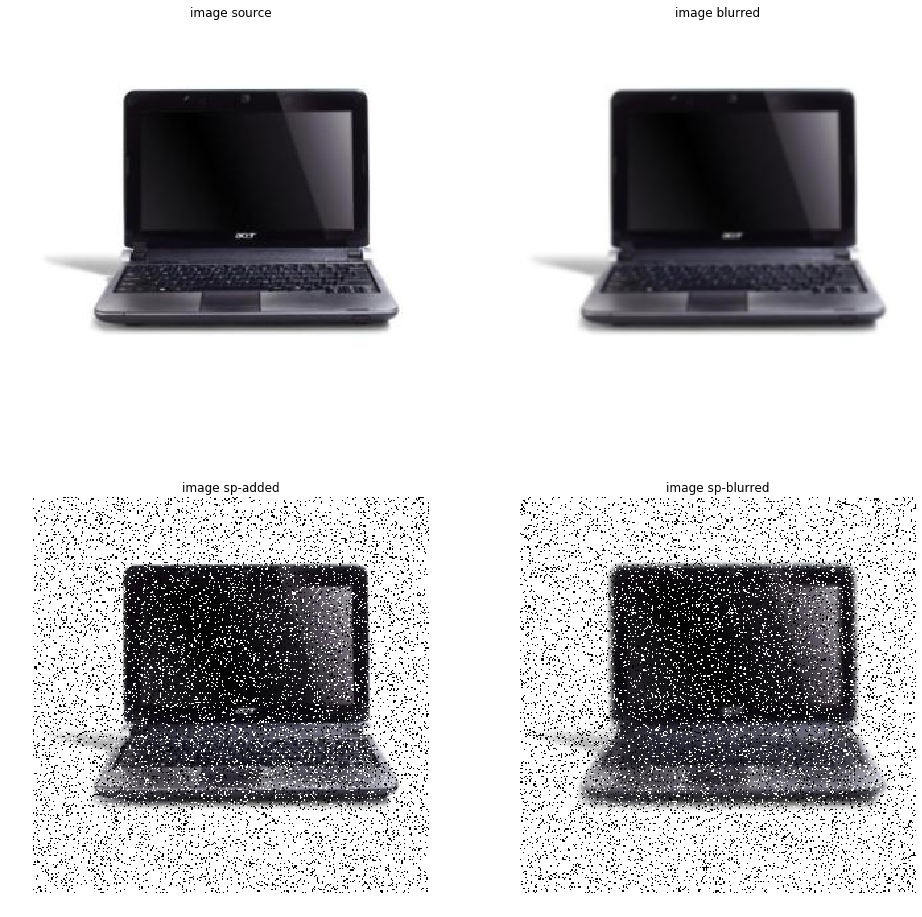

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

# create the plot
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(image)

axs[1].axis('off')
axs[1].set_title('image blurred')
axs[1].imshow(blur_image)

axs[2].axis('off')
axs[2].set_title('image sp-added')
axs[2].imshow(sp_img)

axs[3].axis('off')
axs[3].set_title('image sp-blurred')
axs[3].imshow(sp_blur_img)

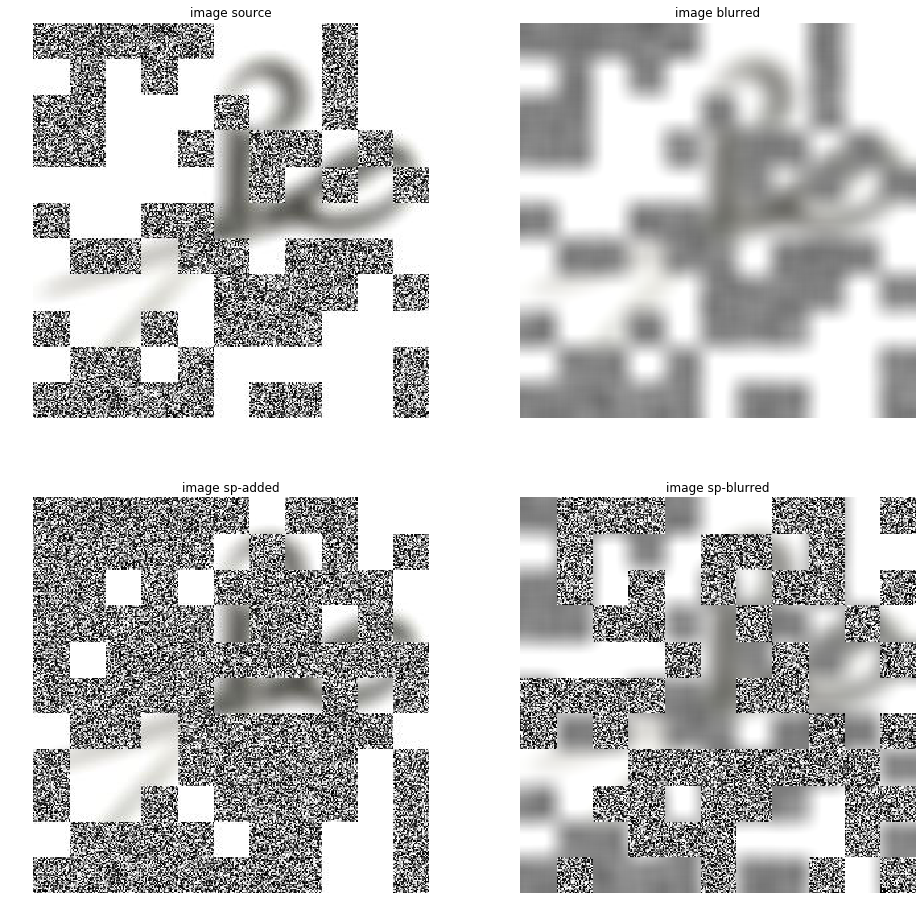

In [153]:
from imgaug import augmenters as iaa
image = Image.open('/home/hanzhongyi/datasets/office/office-31/amazon/images/scissors/frame_0008_corrupted.jpg')
image = np.asarray(image)
sp = iaa.CoarseSaltAndPepper(p=0.5, size_percent=0.04)
blur = iaa.GaussianBlur(sigma=8.00)
sp_blur = iaa.Sequential([
            iaa.GaussianBlur(sigma=8.00),
            iaa.CoarseSaltAndPepper(p=0.5, size_percent=0.04)
        ])
sp_img = sp.augment_image(image)
blur_img = blur.augment_image(image)
sp_blur_img = sp_blur.augment_image(image)

import matplotlib.pyplot as plt
%matplotlib inline

# create the plot
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(image)

axs[1].axis('off')
axs[1].set_title('image blurred')
axs[1].imshow(blur_img)

axs[2].axis('off')
axs[2].set_title('image sp-added')
axs[2].imshow(sp_img)

axs[3].axis('off')
axs[3].set_title('image sp-blurred')
axs[3].imshow(sp_blur_img)

In [136]:
# listing Office-home datasets into txt
import glob
domains = ['Art', 'Clipart', 'Product', 'Real_world']
data_dir = '/home/hanzhongyi/datasets/office/office-home/'
save_dir = '../Office-home/'
for d in domains:
    str_labels, num_labels = [], []
    file_dir = data_dir + d + '/*/*.jpg'
    save_file = save_dir + d + '.txt'
    img_files = glob.glob(file_dir, recursive=True)
    label = 0
    first = True
    for img in img_files:
        str_label = img.split('/')[7]     
        if first:
            num_labels.append(label)
            str_labels.append(str_label)
            first = False
        else:
            if str_label not in str_labels:
                label += 1
                str_labels.append(str_label)
                num_labels.append(label)
            else:
                num_labels.append(label)
    print(str_labels)
#     with open(save_file,'w') as f:
#         for i, d in enumerate(img_files):
#             f.write('{} {}\n'.format(d, num_labels[i]))

['Drill', 'Notebook', 'Pan', 'Spoon', 'Candles', 'Pen', 'Batteries', 'Shelf', 'Scissors', 'Folder', 'Curtains', 'Bed', 'Desk_Lamp', 'Glasses', 'Toys', 'Helmet', 'Exit_Sign', 'Kettle', 'File_Cabinet', 'Postit_Notes', 'Bottle', 'Pencil', 'Printer', 'Knives', 'Flipflops', 'Sneakers', 'Calculator', 'TV', 'Table', 'Speaker', 'Hammer', 'Telephone', 'Mug', 'Alarm_Clock', 'Mop', 'Radio', 'Chair', 'Computer', 'Sink', 'Lamp_Shade', 'Flowers', 'Screwdriver', 'Oven', 'Couch', 'Push_Pin', 'Bike', 'Webcam', 'Backpack', 'Paper_Clip', 'Fan', 'Eraser', 'Bucket', 'Soda', 'Mouse', 'Refrigerator', 'Ruler', 'Fork', 'Laptop', 'Calendar', 'Monitor', 'Keyboard', 'Trash_Can', 'Marker', 'Clipboards', 'ToothBrush']
['Drill', 'Notebook', 'Pan', 'Spoon', 'Candles', 'Pen', 'Batteries', 'Shelf', 'Scissors', 'Folder', 'Curtains', 'Bed', 'Desk_Lamp', 'Glasses', 'Toys', 'Helmet', 'Exit_Sign', 'Kettle', 'File_Cabinet', 'Postit_Notes', 'Bottle', 'Pencil', 'Printer', 'Knives', 'Flipflops', 'Sneakers', 'Calculator', 'TV', 

In [193]:
import glob
import os
domains = ['Bing', 'Caltech']
bing_dir = '/home/hanzhongyi/datasets/Bing/BingLarge_C256_deduped/'
caltech_dir = '/home/hanzhongyi/datasets/Caltech/256_ObjectCategories/'
save_dir = '../Bing-Caltech/'

data_dir = [bing_dir, caltech_dir]
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
    
for i, d in enumerate(domains):
    str_labels, num_labels = [], []
    file_dir = data_dir[i] + '*/*.jpg'
    save_file = save_dir + d + '.txt'
    print(file_dir)
    img_files = glob.glob(file_dir, recursive=True)
    print(save_file)
    for img in img_files:
        str_label = img.split('/')[6]
        label = int(str_label.split('.')[0]) -1 # for cross entropy
        num_labels.append(label)
        str_labels.append(str_label)
    print(min(num_labels))
    with open(save_file,'w') as f:
        for i, d in enumerate(img_files):
            f.write('{} {}\n'.format(d, num_labels[i]))

/home/hanzhongyi/datasets/Bing/BingLarge_C256_deduped/*/*.jpg
../Bing-Caltech/Bing.txt
0
/home/hanzhongyi/datasets/Caltech/256_ObjectCategories/*/*.jpg
../Bing-Caltech/Caltech.txt
0


In [192]:
import openpyxl
import numpy as np
import random
path = '../../month3.xlsx'
wb = openpyxl.load_workbook(path)
sheet = wb.get_sheet_by_name('Sheet1')
c3 = 0
for i, column in enumerate(sheet.columns):
    if i == 3:   
        for j, cell in enumerate(column):
            if j >= 5:
                c3 += 1
                #if cell.value == "√":
                    #print('ture')
                #cell.value = "√"
            #print(j, cell.value)
print(c3) 
true_num = int(c3*0.8)+1
false_num = c3 - true_num
true = np.ones(true_num)
false = np.zeros(false_num)
print(len(true))
total = np.concatenate([true, false])
random.shuffle(total)
print(total)

120
97
[1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.]


/home/hanzhongyi/library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  
